# Imports

In [1]:
import re 
import os
import string
import random
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import  naive_bayes
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Data preprocessing

In [2]:
stop_words = stopwords.words("english")
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocessing (text):

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove any word containing a number
    words = [word for word in text.split() if not re.search('\d', word)]
    
    # Remove stop words and apply lemmatization
    stemmed_words = [stemmer.stem(word) for word in words if word.casefold() not in stop_words]

    # Stem the lemmatized words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]

    
    return lemmatized_words

# Reading the text from the files

In [3]:
random.seed(46)
# random.seed(46)
# 46 -> 86.50%

negative = r'review_polarity\txt_sentoken\neg'
positive = r'review_polarity\txt_sentoken\pos'

# Load the English stop words
documents = []

# Loop through the positive and negative folders to read the text files and preprocess it 
for filename in os.listdir(negative):
    if filename.endswith('.txt'):
        with open(os.path.join(negative, filename), 'r') as f:
            contents = f.read()
            documents.append((' '.join(preprocessing(contents)), 0))


for filename in os.listdir(positive):
    if filename.endswith('.txt'):
        with open(os.path.join(positive, filename), 'r') as f:
            contents = f.read()
            documents.append((' '.join(preprocessing(contents)), 1))



# Shuffle the documents to ensure a balanced distribution of labels in the training and test sets
random.shuffle(documents)


# Split the dataset into features (X) and labels (y)
X = [d[0] for d in documents]
Y = [d[1] for d in documents]


# Split the dataset into training and test sets
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
 

# Vectorize the training documents using TF-IDF
vectorizer = TfidfVectorizer()
X_Train = vectorizer.fit_transform(X_Train)

# Vectorize the test documents using TF-IDF
X_Test = vectorizer.transform(X_Test)



# Logistic Regression

In [4]:

logreg = LogisticRegression()

logreg.fit(X_Train, Y_Train)

predicted_labels = logreg.predict(X_Test)

LogisticAccuracy = accuracy_score(Y_Test, predicted_labels)

print(f'Logistic Regression accuracy: {LogisticAccuracy * 100:.2f}%')

# Logistic Regression accuracy: 83.75%



Logistic Regression accuracy: 83.50%


# SVM

In [5]:

svm = SVC(kernel='sigmoid')

svm.fit(X_Train, Y_Train)

test_predicted_labels = svm.predict(X_Test)

svmAccuracy = accuracy_score(Y_Test, test_predicted_labels)

print(f'SVM Accuracy: {svmAccuracy * 100:.2f}%')

# SVM Accuracy: 85.50%


SVM Accuracy: 85.50%


# Linear SVM

In [6]:

linear_svm = LinearSVC()

linear_svm.fit(X_Train, Y_Train)

test_predicted_labels = linear_svm.predict(X_Test)

linear_svmAccuracy = accuracy_score(Y_Test, test_predicted_labels)

print(f'Linear SVM Accuracy: {linear_svmAccuracy * 100:.2f}%')

# Linear SVM Accuracy: 86.50%


Linear SVM Accuracy: 86.75%


# Naive Bayes

In [7]:

naive_bayes = naive_bayes.MultinomialNB(alpha=0.6)

naive_bayes.fit(X_Train, Y_Train)

test_predicted_labels = naive_bayes.predict(X_Test)

naive_bayesAccuracy = accuracy_score(Y_Test, test_predicted_labels)

print(f'Naive Bayes Accuracy: {naive_bayesAccuracy * 100:.2f}%')


#Naive Bayes Accuracy: 81.00%

Naive Bayes Accuracy: 81.00%


## Bar graph for used models to visualize accuracies

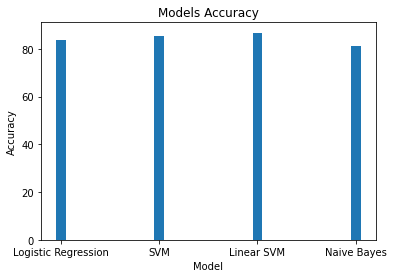

In [8]:
labels = ['Logistic Regression', 'SVM', 'Linear SVM', 'Naive Bayes']

accuracy = [LogisticAccuracy * 100, svmAccuracy * 100, linear_svmAccuracy * 100, naive_bayesAccuracy * 100]
plt.bar(labels, accuracy, width=0.1)
plt.title('Models Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()
